In [ ]:
import pandas as pd
import numpy as np

from pandas import read_csv
from pandas import set_option
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions
from ipywidgets import interact


In [ ]:
spamdata = pd.read_csv('/content/drive/MyDrive/spambase.csv')
spamdata.head(10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [ ]:
spamdata.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,"spam, non-spam classes"
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [ ]:
#Method 1
#Converting Dataframe fisrt row into list of Colomn names 
cols = spamdata[0:0]
#cols.shape
cols = list(cols)
cols

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [ ]:
#Method 2 Convert Dataframe columns to list of Columns name (Easy method)
col_names = spamdata.columns.tolist()
col_names

['word_freq_make',
 'word_freq_address',
 'word_freq_all',
 'word_freq_3d',
 'word_freq_our',
 'word_freq_over',
 'word_freq_remove',
 'word_freq_internet',
 'word_freq_order',
 'word_freq_mail',
 'word_freq_receive',
 'word_freq_will',
 'word_freq_people',
 'word_freq_report',
 'word_freq_addresses',
 'word_freq_free',
 'word_freq_business',
 'word_freq_email',
 'word_freq_you',
 'word_freq_credit',
 'word_freq_your',
 'word_freq_font',
 'word_freq_000',
 'word_freq_money',
 'word_freq_hp',
 'word_freq_hpl',
 'word_freq_george',
 'word_freq_650',
 'word_freq_lab',
 'word_freq_labs',
 'word_freq_telnet',
 'word_freq_857',
 'word_freq_data',
 'word_freq_415',
 'word_freq_85',
 'word_freq_technology',
 'word_freq_1999',
 'word_freq_parts',
 'word_freq_pm',
 'word_freq_direct',
 'word_freq_cs',
 'word_freq_meeting',
 'word_freq_original',
 'word_freq_project',
 'word_freq_re',
 'word_freq_edu',
 'word_freq_table',
 'word_freq_conference',
 'char_freq_;',
 'char_freq_(',
 'char_freq_[',
 '

In [ ]:
spamdata.shape

(4601, 58)

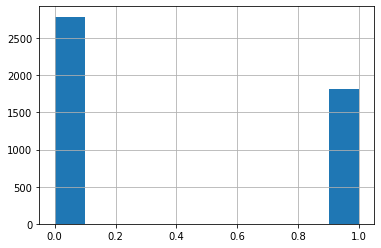

In [ ]:
spamdata['spam, non-spam classes'].hist()
plt.show()

In [ ]:
"""#Separate array into input and output components
X = spamdata.values[:, :-1] #Select the columns to be considered
y = spamdata.values[:, -1]

scaler = MinMaxScaler(feature_range=(0, 1)) # Define the scale range
rescaledX = scaler.fit_transform(X) # Transforms/Scales the selected values

#Summarize transformed data
set_printoptions(precision=1) # Highlights the number after dots (Float)
print(rescaledX[0:10, :]) #Prints the number of raws to be considered"""

'#Separate array into input and output components\nX = spamdata.values[:, :-1] #Select the columns to be considered\ny = spamdata.values[:, -1]\n\nscaler = MinMaxScaler(feature_range=(0, 1)) # Define the scale range\nrescaledX = scaler.fit_transform(X) # Transforms/Scales the selected values\n\n#Summarize transformed data\nset_printoptions(precision=1) # Highlights the number after dots (Float)\nprint(rescaledX[0:10, :]) #Prints the number of raws to be considered'

In [ ]:
#Separate array into input and output components
X = spamdata.values[:, :-1] #Select the columns to be considered
y = spamdata.values[:, -1]

In [ ]:
spamdata.values[:, -1].shape , spamdata.values[:, :-1].shape 

((4601,), (4601, 57))

In [ ]:
#Some data visualization
def plot_feature(feature):
    plt.plot(spamdata[feature], y, '.', color='red')
    plt.xlabel(feature)
    plt.ylabel('spam, non-spam classes')

menu = col_names

interact(plot_feature, feature=menu);

interactive(children=(Dropdown(description='feature', options=('word_freq_make', 'word_freq_address', 'word_fr…

We can observe how attributes are mostly classified eg: `word_fre_george` which is mostly represented as non spam, while words like `word_freq_direct` are not exactly well classified

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(*shuffle(X, y), test_size=0.1)

print(X_train.shape)
print(X_test.shape)

(4140, 57)
(461, 57)


In [ ]:
# Selecting an effective Model for the Dataset
""" This I am not very sure about the model that will perform well,
implementing a model selection technique to select one with 
good perfomance (Decision tree, Suport Vector Machine, KNN)"""

# Importing the libraries

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Implementing the model selection technique

model_param = {
    'DecisionTreeClassifier':{
        'model': DecisionTreeClassifier(),
        'param': {
            'criterion':['gini', 'entropy'] # Hyper Parameters
        }
    },

    'KNeighborsClassifier':{
        'model': KNeighborsClassifier(),
        'param': {
            'n_neighbors':range(3,15) # Hyper Parameters
        }
    },     
    
    'SVC':{
        'model': SVC(),
        'param': {
            'kernel':['rbf', 'linear', 'sigmoid'],
            'C':range(1,15) # Hyper Parameters
        }
    }

}


In [ ]:
#Trying working with a pipeline
from sklearn.pipeline import Pipeline

model = Pipeline([
    ('scale', StandardScaler()),

    ('Knn',GridSearchCV(KNeighborsClassifier(), 
                       param_grid = {'n_neighbors': range(3, 15),
                                      },
                       cv = 10,
                       verbose = 1,
                       n_jobs = 4)),
    
])

model.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


Pipeline(steps=[('scale', StandardScaler()),
                ('Knn',
                 GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=4,
                              param_grid={'n_neighbors': range(3, 15)},
                              verbose=1))])

In [ ]:
model.score(X_test, y_test)

0.9088937093275488

In [ ]:
scaler = StandardScaler()
X_test_scale = scaler.fit_transform(X_test)

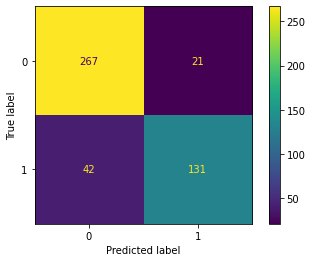

In [ ]:
#The predictions are used to compute the confustion matrix plotted with the ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = model.predict(X_test_scale)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

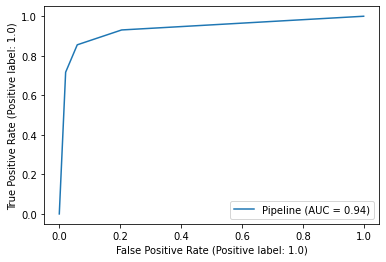

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics


RocCurveDisplay.from_estimator(
    model, X_test, y_test)

plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y, model.predict_proba(X)[:, 1])

0.9873938698749112

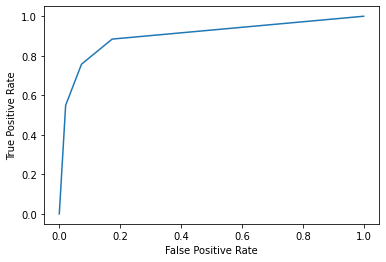

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn import metrics

#fpr, tpr, thresholds = metrics.roc_curve(y, pred)

y_score = model.predict_proba(X_test_scale)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [ ]:
print(model_param.items())

dict_items([('DecisionTreeClassifier', {'model': DecisionTreeClassifier(), 'param': {'criterion': ['gini', 'entropy']}}), ('KNeighborsClassifier', {'model': KNeighborsClassifier(), 'param': {'n_neighbors': range(3, 15)}}), ('SVC', {'model': SVC(), 'param': {'kernel': ['rbf', 'linear', 'sigmoid'], 'C': range(1, 15)}})])


In [ ]:
# Fit and Verify the Score from Each Model
score =[]
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
for model_name, model_p in model_param.items():
  model_selection = GridSearchCV(estimator = model_p['model'],
                                 param_grid= model_p['param'],
                                 verbose=1,
                                 cv=5, 
                                 return_train_score=False) 
  
  model_selection.fit(X_train_scale, y_train)

  score.append({
     'model':model_name,
     'best_score': model_selection.best_score_,
     'best_params': model_selection.best_params_
})

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 42 candidates, totalling 210 fits


In [ ]:
score

[{'best_params': {'criterion': 'entropy'},
  'best_score': 0.9219806763285024,
  'model': 'DecisionTreeClassifier'},
 {'best_params': {'n_neighbors': 3},
  'best_score': 0.9135265700483091,
  'model': 'KNeighborsClassifier'},
 {'best_params': {'C': 5, 'kernel': 'rbf'},
  'best_score': 0.9338164251207729,
  'model': 'SVC'}]

In [ ]:
# Creating a new Dataframe to display the scores
model_df = pd.DataFrame(score, columns=['model', 'best_score', 'best_params'])
model_df

,model,best_score,best_params
0,DecisionTreeClassifier,0.921981,{'criterion': 'entropy'}
1,KNeighborsClassifier,0.913527,{'n_neighbors': 3}
2,SVC,0.933816,"{'C': 5, 'kernel': 'rbf'}"
